In [1]:
from tensorflow.keras.applications import EfficientNetB7

pre_trained_EfficientNetB7 = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
pre_trained_EfficientNetB7.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [2]:
pre_trained_EfficientNetB7 = EfficientNetB7(weights='imagenet', include_top=True, input_shape=(600, 600, 3))
pre_trained_EfficientNetB7.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 600, 600, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 600, 600, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 600, 600, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 601, 601, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12398815935643272787
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1728525108
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16073138316999230174
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [1]:
import os
os.getcwd()

'c:\\jupyter\\capston\\bald\\corneous'

# **1. 이미지 증식 및 npz 파일 생성**

In [2]:
import os, glob, random
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ImageDataGenerator를 활용하여 각 레이블당 이미지를 3배로 증식한 후, npz 파일 생성

datapath = "C:/jupyter/capston/bald/data/corneous" # 훈련 데이터 경로
output = "corneousLossAfterGenerate2.npz"  # 저장할 파일 이름
x = []                    # Image
y = []                    # Label

datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    brightness_range = [0.7, 1.3]
)


# 폴더에 있는 이미지 데이터 읽기
# path를 통해 경로를 설정해주고, label을 통해 해당 이미지에 대한 라벨값을 지정해준다
# 예를 들어 양호 카테고리 이미지들은 0을 받아 지정해준다.
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    # 이미지 데이터 처리
    # 함수를 호출할 때마다 반복을 통해 데이터를 x,y 배열에 계속 집어넣는다.
    num = 0
    max_photo = 534  # normal, mild, moderate, severe 중 가장 작은 이미지 개수로 설정
    for i, f in enumerate(files):
         # max_photo 값보다 커질 경우, 루프 벗어남.
        if num >= max_photo:   
            break
        num += 1
        
        # 이미지 데이터 읽기
        img = Image.open(f)
        img = img.resize((256,256))  # 이미지 사이즈 256 * 256 설정
        img = img.convert("RGB")
        img = np.asarray(img)        # RGB 색상값 0부터 1까지의 실수값 변환
        
        # 원본 이미지 저장
        x.append(img)
        y.append(label)
        
        # 이미지 증식
        # batch_size=1 -> 전체 이미지를 변형시킬 것이다.
        img = img.reshape((1,) + img.shape)
        for _ in range(2):
            for batch in datagen.flow(img, batch_size=1):
                augment_img = batch[0]
                x.append(augment_img)
                y.append(label)
                break

        if i % 100 == 0:
            print("run: " + f)

# 바꾼 코드 !!
# 폴더에 있는 이미지 데이터 읽고 레이블 지정
# 반복문을 통해 양호, 경증, 중등도, 중증 이미지를 가져온다.
# 또한 glob_files 함수를 호출할 때 각각의 라벨을 지정한다.
# i = 0 -> 양호, ... i = 3 -> 중증
categories = ['normal', 'mild', 'moderate', 'severe']
def main():
    for i in range(4): 
        file = datapath + "/" + categories[i]
        print(categories[i] + " 실행")
        glob_files(file, i)
        
    # 파일로 저장
    np.savez(output, x=x, y=y) # Numpy 압축파일로 저장
    print(str(len(x)) + "개의 이미지를 저장했습니다. 파일명: " + output)
    
# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

normal 실행
run: C:/jupyter/capston/bald/data/corneous/normal\1080_A2LEBJJDE00092R_1606016206481_6_BH.jpg
run: C:/jupyter/capston/bald/data/corneous/normal\3046_A2LEBJJDE00089J_1604727533726_3_TH.jpg
run: C:/jupyter/capston/bald/data/corneous/normal\5619_A2LEBJJDE00002B_1606721833214_3_TH.jpg
run: C:/jupyter/capston/bald/data/corneous/normal\3046_A2LEBJJDE00089J_1605953970459_2_TH.jpg
run: C:/jupyter/capston/bald/data/corneous/normal\1069_A2LEBJJDE00094D_1607308325445_6_BH.jpg
run: C:/jupyter/capston/bald/data/corneous/normal\1080_A2LEBJJDE00092R_1606125516850_4_LH.jpg
mild 실행
run: C:/jupyter/capston/bald/data/corneous/mild\2487_A2LEBJJDE00050U_1602808544220_2_TH.jpg
run: C:/jupyter/capston/bald/data/corneous/mild\7978_A2LEBJJDE00071B_1603087475248_6_BH.jpg
run: C:/jupyter/capston/bald/data/corneous/mild\9316_A2LEBJJDE00034E_1604911425411_3_TH.jpg
run: C:/jupyter/capston/bald/data/corneous/mild\9447_A2LEBJJDE00145V_1603369979642_4_LH.jpg
run: C:/jupyter/capston/bald/data/corneous/mild\69

### **1-1. label 개수 체크**

In [2]:
import numpy as np

## 각 label당 이미지 개수 추출

# npz 파일 불러오기
data = np.load('corneousLossAfterGenerate.npz')

# 레이블 데이터 로드
labels = data['y']

# 각 레이블의 개수 확인
# unique -> 중복된 라벨을 instinct시킴 즉 0~3
# counts -> return_counts 속성을 True로 설정해 각 라벨 수를 측정한다.
unique, counts = np.unique(labels,return_counts=True)
label_counts = dict(zip(unique, counts))

print("Label 개수: ", label_counts)

Label 개수:  {0: 1602, 1: 1602, 2: 1602, 3: 1602}


### **1-2. npz 이미지 출력**
imshow 오류 해결 링크: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

<function matplotlib.pyplot.show(close=None, block=None)>

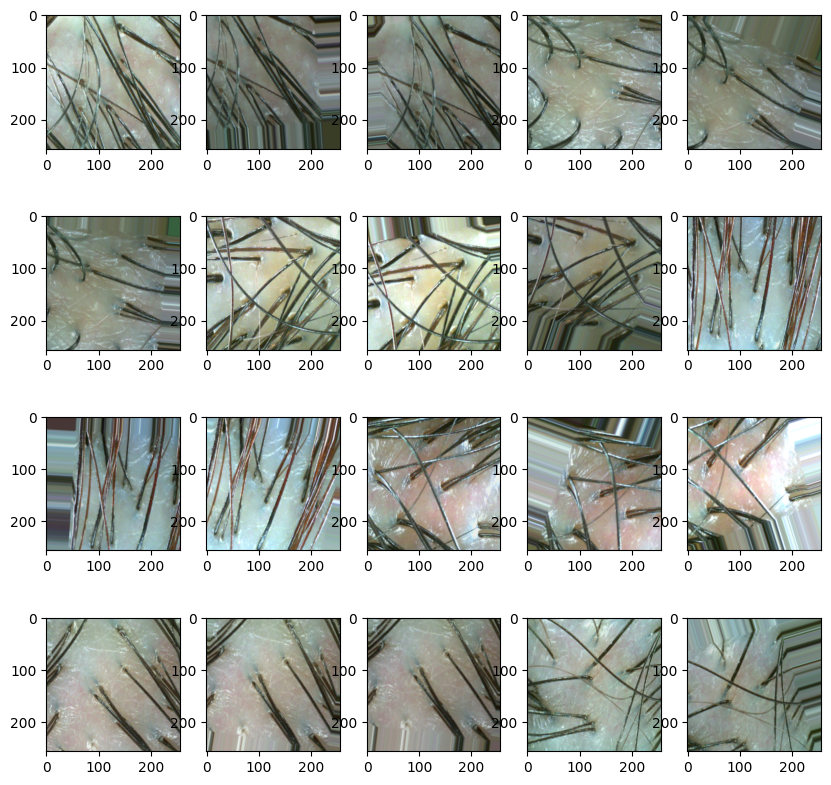

In [4]:
import matplotlib.pyplot as plt

# 이미지 확인
# np.load를 통해 배열 데이터를 가져오고 이를 photos변수에 집어넣는다
# photos 배열 데이터의 x= 이미지 y= 라벨을 각각 집어넣는다.
photos = np.load("corneousLossAfterGenerate2.npz")
x = photos["x"]
y = photos["y"]

# 시작 인덱스 설정
idx = 0  

# subplot으로 인덱스로 설정한 이미지 출력
# plt.figure을 통해 최초 창의 크기를 가로 세로 9인치로 설정한다.
# 20번 반복해서 4행 5열 i+1번째에 이미지를 imshow를 통해 가져와서 출력한다.
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x[i+idx].astype("uint8"))
    
plt.show

# **2. 데이터셋 구분 및 실행**

In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# npz 파일을 불러와 데이터셋 구분
def preprocessing(file, hairClass):
    global shape, x_train, y_train, x_val, y_val, x_test, y_test
    rows = 256                 # 이미지 높이
    cols = 256                 # 이미지 너비
    color = 3                  # 이미지 색공간
    shape = (rows, cols, color)
    hairClass = hairClass      # 출력 데이터 수
    
    # 사진 데이터 읽기
    # 데이터를 읽은 후 해당 파일의 x(이미지)는 x에  y(라벨 0,1,2,3)은 y에 넣는다.
    photo = np.load(file)
    x = photo['x']
    y = photo['y']
    
    # 데이터 1차원에서 3차원 배열로 변환 및 정규화
    x = x.reshape(-1, rows, cols, color)
    x = x.astype('float32') / 255
    
    # 레이블 One-Hot Encoding 변환
    y = to_categorical(y.astype('int32'), hairClass)
    
    # 전체 데이터셋 -> 학습 데이터셋과 테스트 데이터셋으로 구분
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.2, random_state=77)
    
    # 훈련 데이터셋 -> 학습 데이터셋과 검증 데이터셋으로 구분
    # 만약 train_test_split의 test_size속성이 생략되어 있다면 해당 default값은 0.25이다.
    # 만약 train_test_split의 shuffle속성이 생략되어 있다면 해당 default값은 True이다.
    # 즉 데이터셋를 알아서 섞게 된다.
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=0.2, random_state=77)
    
    # 데이터셋 확인
    print(x_train.shape, y_train.shape)
    print(x_val.shape, y_val.shape)
    print(x_test.shape, y_test.shape)

# 데이터셋 구분 실행
# preprocessing을 통해 
preprocessing('corneousLossAfterGenerate2.npz', 4)

(4100, 256, 256, 3) (4100, 4)
(1026, 256, 256, 3) (1026, 4)
(1282, 256, 256, 3) (1282, 4)


# **3. ImageNet: 모델 정의**

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet101, InceptionV3, Xception, EfficientNetB2

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam

# trainable 속성을 False로 설정하면 Imagenet 모델의 사전 학습된 가중치를 사용하여 모델의 예측을 생성한다.
# trainable 속성을 True로 설정하면 fine tuning을 수행할 수 있다.

# include_top 속성을 False로 설정하면 기존 Imagenet 모델의 Fully Connected Layer를 제외하고 가져온다.
# include_top 속성을 True로 설정하면 Fully Connected Layer를 포함한 Imagenet 모델을 전부 가져온다.

# VGG16 모델
def def_VGG16(shape, hairClass):
  pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_vgg.trainable = False
  model = Sequential()
  model.add(pre_trained_vgg)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(4096, activation='relu'))
  model.add(Dense(2048, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(hairClass, activation='softmax'))
  
  # 모델 요약
  model.summary()

  # 모델 컴파일 
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.0001),
                metrics=['accuracy'])
  
  return model

# ResNet101 모델
def def_ResNet(shape, hairClass):
  pre_trained_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_resnet.trainable = False
  model = Sequential()
  model.add(pre_trained_resnet)

  # 레이어 추가(재정의)
  model.add(Flatten())
  model.add(Dense(hairClass, activation='softmax'))

  # 모델 요약
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=0.00001),
                     metrics=['accuracy'])  
  
  return model

# InceptionV3 모델
def def_InceptionV3(shape, hairClass):
  pre_trained_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_inceptionv3.trainable = False
  model = Sequential()
  model.add(pre_trained_inceptionv3)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(hairClass, activation='softmax'))
  
  # 모델 요약
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=0.0001),
                     metrics=['accuracy'])
  
  return model

# Xception 모델
def def_Xception(shape, hairClass):
  pre_trained_Xception = Xception(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_Xception.trainable = False
  model = Sequential()
  model.add(pre_trained_Xception)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(hairClass, activation='softmax'))

  # 모델 요약 
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=0.0001),
                     metrics=['accuracy'])
  
  return model

# EfficientNetB2 모델(폐기)
#def def_EfficientNetB2(shape, hairClass):
#  pre_trained_EfficientNetB2 = EfficientNetB2(weights='imagenet', include_top=False, input_shape=shape)
#  pre_trained_EfficientNetB2.trainable = False
#  model = Sequential()
#  model.add(pre_trained_EfficientNetB2)

  # 레이어 추가(재정의)
#  model.add(GlobalAveragePooling2D())
#  model.add(Dropout(0.3))
#  model.add(Dense(hairClass, activation='softmax'))

  # 모델 요약 
#  model.summary() 

  # 모델 컴파일
#  model.compile(loss='categorical_crossentropy',
#                     optimizer=Adam(),
#                     metrics=['accuracy'])
  
#  return model

### **3-1. 모델 학습, 저장 정의**

In [6]:
import tensorflow as tf
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

def model_train(x_train, y_train, x_val, y_val, modelFunc, modelName):
  # 모델 생성
  # shape는 데이터셋 구분시 초기화된 변수이다. -> (256, 256, 3)
  model = modelFunc(shape, 4)

  # 모델이 저장될 경로 체크
  model_dir = './model'

  if not os.path.exists(model_dir): # 해당 위치에 경로(폴더)가 없으면
    os.mkdir(model_dir) # 변수명 model_dir로 생성시킴

  # 폴더 경로 변경
  os.chdir('C:/jupyter/capston/bald/corneous/model')

  # 콜백 함수 설정
  # ModelCheckpoint란 모델을 저장할 때 사용하는 콜백 함수이다.
  # filepath -> 모델 저장 경로
  # monitor -> 모델 저장 시 기준이 되는 값으로 해당 코드에서는 val_loss을 저장하게 된다
  # verbose -> 1=저장되었다는 코맨트 0=코맨트 없음
  # save_besr_only -> monitor되는 값을 기준으로 가장 좋은 값을 저장한다.
  checkpoint = ModelCheckpoint(f'corneous5_{modelName}.h5', monitor='val_loss', verbose=1, save_best_only=True)

  # EarlyStopping이란 특정 시점에서 훈련을 멈추는 콜백 함수이다.
  # monitor -> 모니터링할 값
  # mode -> 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정한다. 
  # monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min을 설정한다. 입력하지 않으면 auto로 설정해 알아서 판단해준다.
  # patience -> 20번 이상 변동 없으면 중지시킨다. -> 일단 다 출력해본다.
  early_stopping = EarlyStopping(monitor='val_loss', patience=20)

  # 모델 훈련
  with tf.device("/device:GPU:0"):
    history = model.fit(x_train, y_train,
                        batch_size=16, 
                        epochs=50,
                        verbose=1,
                        validation_data=(x_val, y_val),
                        callbacks=[early_stopping, checkpoint])
        
  
  # 모델 저장
  model.save(f'corneous_{modelName}.h5')

  return model, history

### **모델 생성 및 훈련**

In [7]:
model_VGG16, history_VGG16 = model_train(x_train, y_train, x_val, y_val, def_VGG16, 'VGG16')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 4096)              2101248   
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               5


Epoch 00033: val_loss did not improve from 0.89564
Epoch 34/50
257/257 [==============================] - 30s 118ms/step - loss: 0.1199 - accuracy: 0.9576 - val_loss: 2.1060 - val_accuracy: 0.6199

Epoch 00034: val_loss did not improve from 0.89564
Epoch 35/50
257/257 [==============================] - 30s 118ms/step - loss: 0.1292 - accuracy: 0.9580 - val_loss: 1.3319 - val_accuracy: 0.6901

Epoch 00035: val_loss did not improve from 0.89564
Epoch 36/50
257/257 [==============================] - 30s 118ms/step - loss: 0.0776 - accuracy: 0.9746 - val_loss: 1.3837 - val_accuracy: 0.6949

Epoch 00036: val_loss did not improve from 0.89564
Epoch 37/50
257/257 [==============================] - 30s 118ms/step - loss: 0.1010 - accuracy: 0.9663 - val_loss: 1.5350 - val_accuracy: 0.6891

Epoch 00037: val_loss did not improve from 0.89564
Epoch 38/50
257/257 [==============================] - 30s 118ms/step - loss: 0.0842 - accuracy: 0.9707 - val_loss: 1.3170 - val_accuracy: 0.6979

Epoch 000

### **3-2. history 확인**

In [8]:
# 나머지 모델 또한 동일함

print(history_VGG16.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### **4. 그래프 정의**

In [9]:
import matplotlib.pyplot as plt

def model_plot(history, modelName):
  # loss
  y_loss = history.history['loss']
  y_vloss = history.history['val_loss']
  
  x_len = range(1,len(y_loss) + 1)

  fig = plt.figure(figsize=(10, 4))
  ax = fig.add_subplot(1, 2, 1)

  ax.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
  ax.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')
  ax.set_title(modelName + ': train&val loss')
  ax.legend()

  # accuracy
  y_acc = history.history['accuracy']
  y_vacc = history.history['val_accuracy']
  
  x_len = range(1, len(y_acc) + 1)
  ax = fig.add_subplot(1, 2, 2)
  ax.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
  ax.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Accuracy')
  ax.set_title(modelName + ': train&val accuracy')
  ax.legend()

  plt.tight_layout()
  plt.show()

### **4-1. 그래프 출력**

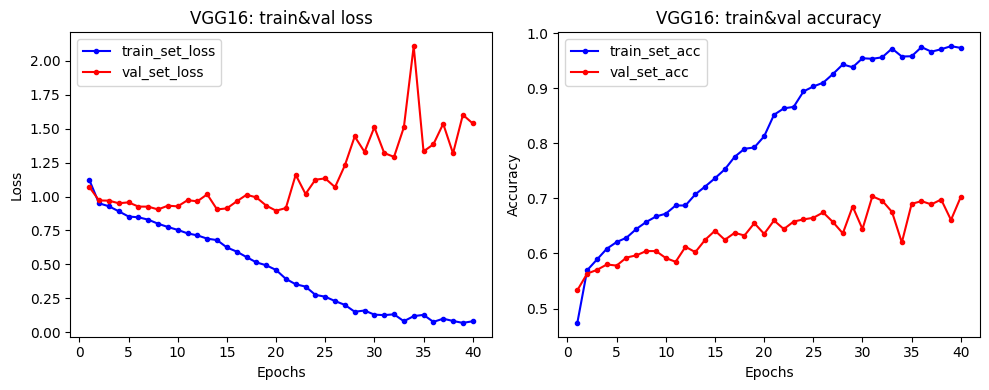

In [10]:
model_plot(history_VGG16, 'VGG16')

### **5. 혼돈행렬 정의**

In [11]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# history와 model을 이용한 방법
def confusionMatrix_model(model, modelName, x_test, y_test):
    # 모델을 이용해 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # softmax 확률 출력을 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Labeling
    label = ['normal', 'mild', 'moderate', 'severe']
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

    # 분류 보고서 출력
    print(classification_report(y_true, y_pred_classes))

    
# 생성된 .h5 파일을 이용하여 생성
def confusionMatrix_h5(model_path, modelName, x_test, y_test):
    
    # 모델 로드
    model = load_model(model_path)

    # 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # 예측 결과를 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

### **5-1. 혼돈행렬 출력**

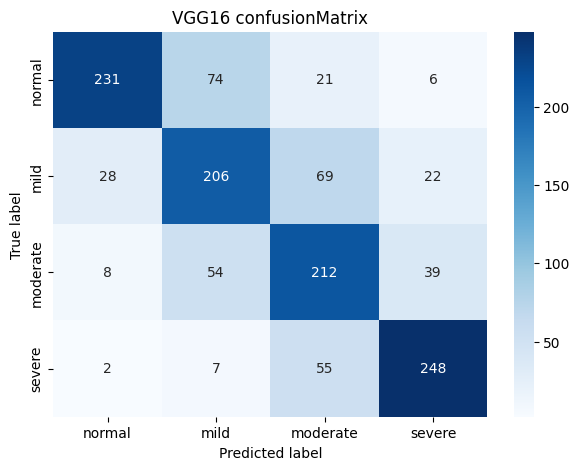

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       332
           1       0.60      0.63      0.62       325
           2       0.59      0.68      0.63       313
           3       0.79      0.79      0.79       312

    accuracy                           0.70      1282
   macro avg       0.71      0.70      0.70      1282
weighted avg       0.71      0.70      0.70      1282



In [12]:
with tf.device("/device:CPU:0"):
    confusionMatrix_model(model_VGG16, 'VGG16', x_test, y_test)

# **6. 모델 evaluate 정의**

In [13]:
def model_evaluate(model, x_test, y_test):
    test_result = model.evaluate(x_test, y_test, verbose=1)
    print("acc: ", test_result[1], 'loss: ', test_result[0])

    return test_result[1], test_result[0]

# **6-1. 모델 evaluate 출력**

In [14]:
with tf.device("/device:CPU:0"):
    accuracy_VGG16, loss_VGG16 = model_evaluate(model_VGG16, x_test, y_test)

41/41 [==============================] - 102s 2s/step - loss: 1.4872 - accuracy: 0.6997
acc:  0.6996879577636719 loss:  1.4872441291809082
